In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
import math
median_bedrooms= math.floor(df.bedrooms.median())
median_bedrooms

4

In [ ]:
df.bedrooms.fillna(median_bedrooms)

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [ ]:
df['bedrooms']= df.bedrooms.fillna(median_bedrooms)

In [ ]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
reg= linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']], df.price)

LinearRegression()

In [ ]:
import math
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.predict([[2600,3.0,20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([518217.63297611])

EXERCISE

In [ ]:
df= pd.read_csv('hiring.csv')
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5566 sha256=a314cf82ce7b304bfb44e590b88ecb7e4c02d138801cdddbd9920c9a51d67970
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
from word2number import w2n

In [ ]:
df.experience=df.experience.fillna('zero')


In [ ]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [ ]:
df.experience.value_counts()

experience
zero      2
five      1
two       1
seven     1
three     1
ten       1
eleven    1
Name: count, dtype: int64

In [ ]:
df['experience'].dtypes

dtype('O')

In [ ]:
df['experience'] = df.experience.apply(w2n.word_to_num)

In [ ]:
df.head()


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [ ]:
df.isna().value_counts()

experience  test_score(out of 10)  interview_score(out of 10)  salary($)
False       False                  False                       False        7
            True                   False                       False        1
Name: count, dtype: int64

In [ ]:
import math
mean_test_score= math.floor(df['test_score(out of 10)'].mean())
mean_test_score

7

In [ ]:
df['test_score(out of 10)']= df['test_score(out of 10)'].fillna(mean_test_score)
df.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
model= linear_model.LinearRegression()
model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [ ]:
model.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

#Gradient Descent

In [ ]:
import numpy as np
def gradient_descent(x,y):
  m_curr= b_curr = 0
  iterations= 10000
  learning_rate = 0.001
  n=len(x)

  for i in range(iterations):
    y_predicted= m_curr * x + b_curr
    mse = (1/n) * sum([ val**2 for val in (y-y_predicted)])
    md= -(2/n)*sum(x*(y-y_predicted))
    bd= -(2/n)*sum(y-y_predicted)
    m_curr= m_curr - learning_rate * md
    b_curr = b_curr - learning_rate * bd
    print("m {} , b {}, interations {}, mse {}".format(m_curr, b_curr, i, mse))


x= np.array([1,2,3,4,5])
y= np.array([5,7,9,11,13])


gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m 2.1159781987036776 , b 2.5812819029965524, interations 5000, mse 0.03193377887660422
m 2.1159389869142173 , b 2.581423469998337, interations 5001, mse 0.031912189147685885
m 2.1158997883821145 , b 2.5815649891368553, interations 5002, mse 0.03189061401511098
m 2.115860603102887 , b 2.581706460428289, interations 5003, mse 0.031869053469010554
m 2.1158214310720536 , b 2.581847883888815, interations 5004, mse 0.03184750749952369
m 2.1157822722851356 , b 2.581989259534605, interations 5005, mse 0.03182597609679516
m 2.115743126737655 , b 2.5821305873818248, interations 5006, mse 0.031804459250976906
m 2.115703994425136 , b 2.5822718674466354, interations 5007, mse 0.03178295695222696
m 2.115664875343103 , b 2.5824130997451915, interations 5008, mse 0.03176146919071039
m 2.1156257694870835 , b 2.5825542842936424, interations 5009, mse 0.031739995956599286
m 2.115586676852606 , b 2.5826954211081325, interations 5010, mse 0.031718537240071

#Exercise
 Using the gradient i want to find the line of bestfit  

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('test_scores.csv')
df.head()

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


In [ ]:
import numpy as np
import math
def gradient_descent(x,y):
  m_curr=0
  b_curr = 0
  iterations= 100
  learning_rate = 0.002
  n=len(x)
  cost_previous = 0

  for i in range(iterations):
    # y_predicted= m_curr * x + b_curr
    # mse =(1/n)*sum([value**2 for value in (y-y_predicted)])
    # bd= -(2/n)*sum(y-y_predicted)
    # md = -(2/n)*sum(x*(y-y_predicted))
    # m_curr= m_curr - learning_rate * md
    # b_curr = b_curr - learning_rate * bd
    y_predicted = m_curr * x + b_curr
    mse = (1/n)*sum([value**2 for value in (y-y_predicted)])
    md = -(2/n)*sum(x*(y-y_predicted))
    bd = -(2/n)*sum(y-y_predicted)
    m_curr = m_curr - learning_rate * md
    b_curr = b_curr - learning_rate * bd
    if math.isclose(mse, cost_previous, rel_tol=1e-20):
            break
    cost_previous = mse
    #print("m {} , b {}, iterations {}, mse {}".format(m_curr, b_curr, i, mse))
    print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,mse, i))


  return m_curr, b_curr



if __name__ == "__main__":
  df = pd.read_csv("test_scores.csv")
  x = np.array(df.math)
  y = np.array(df.cs)

  m, b = gradient_descent(x,y)
  print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

m 19.783600000000003, b 0.2796, cost 5199.1, iteration 0
m -335.1297587200002, b -4.728096320000001, cost 1663047.8675860171, iteration 1
m 6031.9342997386275, b 85.11708759526404, cost 535217407.45495206, iteration 2
m -108191.7332859175, b -1526.6766256452784, cost 172251878290.197, iteration 3
m 1940954.6398105891, b 27388.54081485446, cost 55436745729521.01, iteration 4
m -34820260.85414845, b -491343.8135057944, cost 1.7841505173406942e+16, iteration 5
m 624667505.5305753, b 8814595.541576693, cost 5.742027290093572e+18, iteration 6
m -11206391619.34151, b -158131820.03875938, cost 1.8479874360221043e+21, iteration 7
m 201040092926.6073, b 2836848548.2090473, cost 5.947477068921944e+23, iteration 8
m -3606613112643.927, b -50892411675.69367, cost 1.914108440125197e+26, iteration 9
m 64701811240801.0, b 912998181669.7458, cost 6.1602778423534605e+28, iteration 10
m -1160735639529129.0, b -16378977774598.684, cost 1.9825952542432165e+31, iteration 11
m 2.082333089345585e+16, b 29383

In [ ]:
def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

if __name__ == "__main__":
  df = pd.read_csv("test_scores.csv")
  x = np.array(df.math)
  y = np.array(df.cs)

  m, b = gradient_descent(x,y)
  print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

Streaming output truncated to the last 5000 lines.
m 1.0177384013109885, b 1.9150659927837017, cost 31.604511334879064, iteration 410534
m 1.0177384012613204, b 1.9150659963035586, cost 31.60451133487899, iteration 410535
m 1.017738401211653, b 1.9150659998233346, cost 31.60451133487895, iteration 410536
m 1.0177384011619872, b 1.9150660033430298, cost 31.604511334878886, iteration 410537
m 1.0177384011123225, b 1.9150660068626444, cost 31.60451133487882, iteration 410538
m 1.0177384010626587, b 1.9150660103821782, cost 31.604511334878765, iteration 410539
m 1.0177384010129964, b 1.9150660139016311, cost 31.604511334878694, iteration 410540
m 1.0177384009633348, b 1.9150660174210032, cost 31.60451133487865, iteration 410541
m 1.017738400913675, b 1.9150660209402945, cost 31.60451133487858, iteration 410542
m 1.0177384008640151, b 1.915066024459505, cost 31.604511334878516, iteration 410543
m 1.0177384008143582, b 1.9150660279786347, cost 31.60451133487846, iteration 410544
m 1.01773840

In [ ]:
from sklearn.linear_model import LinearRegression

def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

m_sklearn, b_sklearn = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

Using sklearn: Coef [1.01773624] Intercept 1.9152193111569034


#Logostic regression

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [ ]:
import matplotlib.pyplot as plt

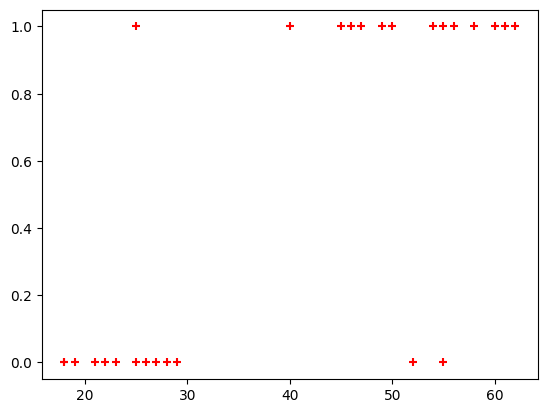

In [ ]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['age']],
    df.bought_insurance,
    test_size= 0.2,
)



In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_preds= model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



#Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [ ]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [ ]:
Left=df[df.left==1]
Left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
stayed= df[df['left']==0]
stayed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [ ]:

mean_values = df[['left', 'satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours','time_spend_company','Work_accident', 'promotion_last_5years']].groupby('left').mean()
print(mean_values)


      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


From the above it seems that employess that are are staying seems to have a slightly higher satisfaction level than those who are leaving.

Last evaluation is almost the same for both parties.  Same as number of project .

For employees staying, they seem to havelower average monthly hours and time spent .

for some reasons work_accident is significantly higher for employees staying , maybe that could be attributed to the fact they do more than others because they enjoy their job.

Employees that stay have recieved more promotion than in the last 5 years than those that stay.


#conclusion
I will take


*   satisfaction_level
*   average_montly_hours
*   Work_accident
*   promotion_last_5years



#Cross Tabulation

<Axes: xlabel='salary'>

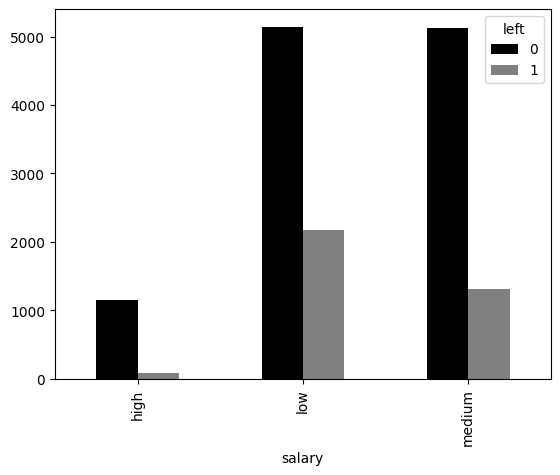

In [ ]:
#promotion_last_5years

# To change the colors, specify them in a list:
colors = ['black', 'grey']  # Customize with your preferred colors


pd.crosstab(df.salary,df.left).plot(kind='bar',color=colors)

Looks like employees who earn more are less likely to leave the company, so I will also throw this into my model.

<Axes: xlabel='Department'>

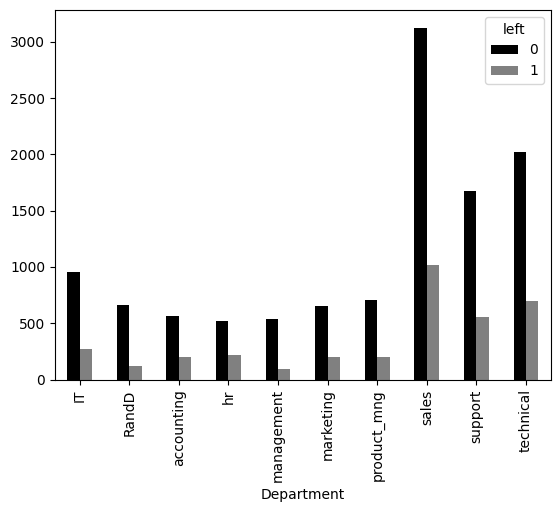

In [ ]:
#departement
colors = ['black', 'grey']

pd.crosstab(df.Department, df.left).plot(kind='bar', color=colors)

I need to handle categorical variables using one hot encoding

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
sub_df= df[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','salary','left']]
sub_df.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left
0,0.38,157,0,0,low,1
1,0.80,262,0,0,medium,1
2,0.11,272,0,0,medium,1
3,0.72,223,0,0,low,1
4,0.37,159,0,0,low,1


In [ ]:
#for some reasons , I am interested in the the details of the avarage_monthly_hours
sub_df.Work_accident.value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [ ]:
correlation = df['Work_accident'].corr(df['left'])

print(f"The correlation between column1 and column2 is: {correlation}")


The correlation between column1 and column2 is: -0.15462163370513518


In [ ]:
sub_df.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [ ]:
df_sal_dummy = pd.get_dummies(sub_df.salary, prefix='salary', dtype=int)
df_sal_dummy

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [ ]:
df_with_dummy= pd.concat([sub_df, df_sal_dummy], axis='columns')
df_with_dummy.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,0,low,1,0,1,0
1,0.80,262,0,0,medium,1,0,0,1
2,0.11,272,0,0,medium,1,0,0,1
3,0.72,223,0,0,low,1,0,1,0
4,0.37,159,0,0,low,1,0,1,0


In [ ]:
df_with_dummy.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157.0,0.0,0.0,low,1.0,NaN,NaN,NaN
1,0.80,262.0,0.0,0.0,medium,1.0,NaN,NaN,NaN
2,0.11,272.0,0.0,0.0,medium,1.0,NaN,NaN,NaN
3,0.72,223.0,0.0,0.0,low,1.0,NaN,NaN,NaN
4,0.37,159.0,0.0,0.0,low,1.0,NaN,NaN,NaN


In [ ]:
df_with_dummy.drop('salary',axis='columns',inplace=True)
df_with_dummy

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0,1,0
1,0.80,262,0,0,1,0,0,1
2,0.11,272,0,0,1,0,0,1
3,0.72,223,0,0,1,0,1,0
4,0.37,159,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0,1,0
14995,0.37,160,0,0,1,0,1,0
14996,0.37,143,0,0,1,0,1,0
14997,0.11,280,0,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_with_dummy[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','salary_high','salary_low','salary_medium']],
    df_with_dummy[['left']],
    test_size=0.2
)

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_preds=model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.7726666666666666

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2285
           1       0.55      0.25      0.34       715

    accuracy                           0.77      3000
   macro avg       0.68      0.59      0.60      3000
weighted avg       0.74      0.77      0.74      3000



#LOGISTIC REGRESSION PART 2

In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [4]:
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

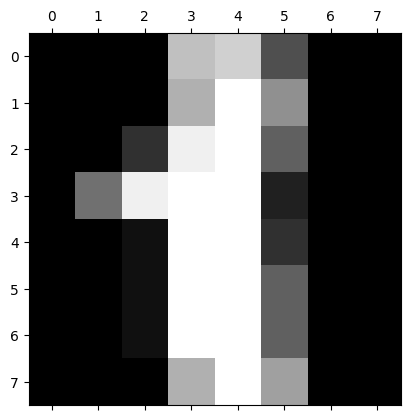

In [13]:
plt.gray()
plt.matshow(digits.images[1])

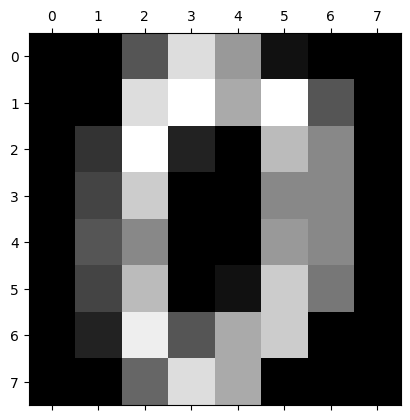

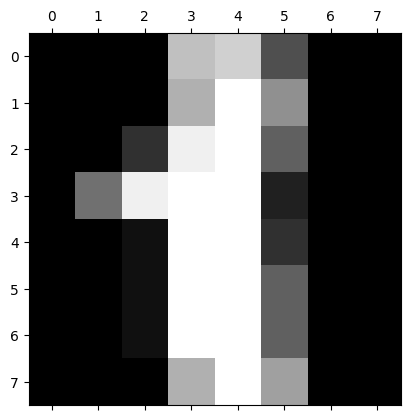

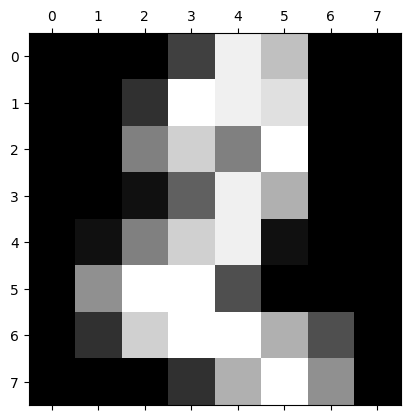

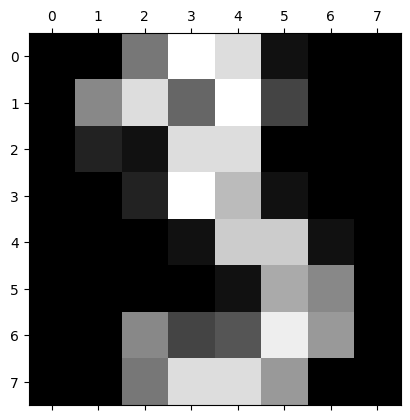

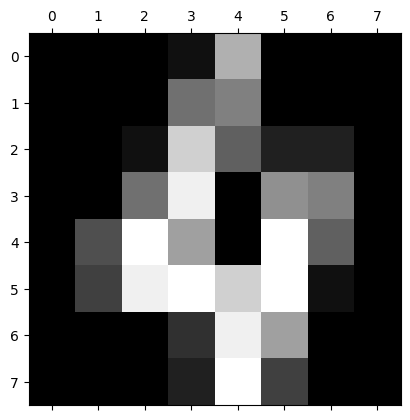

In [17]:
for i in range(5):
  plt.matshow(digits.images[i])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size = 0.2,
)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
model.score(X_test, y_test)

0.9472222222222222

#Exercise


In [25]:
from sklearn.datasets import load_iris
df= load_iris()

In [27]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [37]:
df.target[130]

2

In [38]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
df.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test  =  train_test_split(
    df.data, df.target, test_size= 0.2
)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.score(X_test, y_test)

1.0

In [43]:
y_preds = model.predict(X_test)

Text(95.72222222222221, 0.5, 'True')

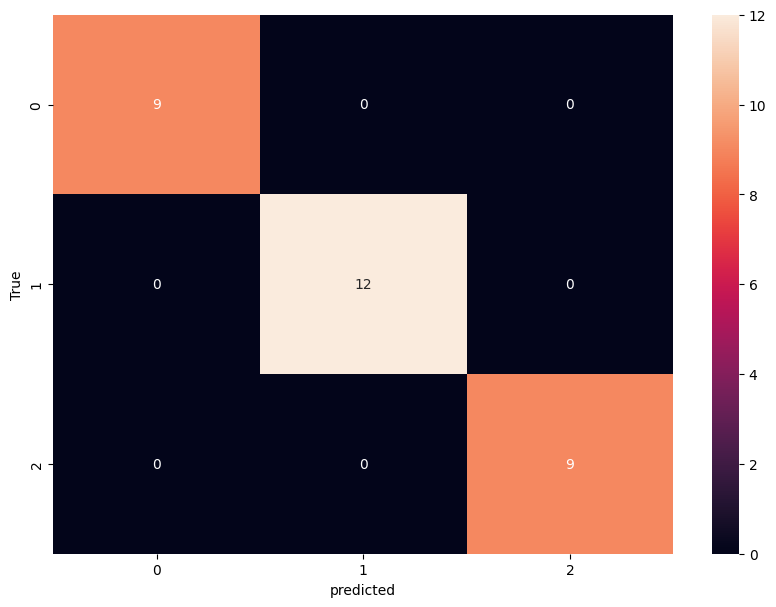

In [46]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_preds)
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('True')

#Decision_Tree

In [52]:
import pandas as pd
df = pd.read_csv('salaries.csv')
df.head()


,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [53]:
n_df = df.drop('salary_more_then_100k', axis='columns')
target= df.salary_more_then_100k

In [54]:
n_df.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [55]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
n_company= LabelEncoder()
n_job = LabelEncoder()
n_degree = LabelEncoder()

n_df['le_company'] = n_company.fit_transform(df.company)
n_df['le_job']= n_job.fit_transform(df.job)
n_df['le_degree'] = n_degree.fit_transform(df.degree)

n_df.head()


,company,job,degree,le_company,le_job,le_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [63]:
n_df=n_df.drop(['company','job', 'degree'],axis='columns')
n_df.head()

,le_company,le_job,le_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    n_df,
    target,
    test_size = 0.2
)


In [72]:
from sklearn import tree
model= tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
model.score(X_test, y_test)

0.75

#Exercise using titanic dataset

In [76]:
df= pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
df= df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [78]:
df.isna().value_counts()

Survived  Pclass  Sex    Age    Fare 
False     False   False  False  False    714
                         True   False    177
Name: count, dtype: int64

In [79]:
n_df = df.drop('Survived',axis=1)
target= df.Survived

In [80]:
n_df.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [87]:
import math
median_age= math.floor(n_df.Age.median())
median_age

28

In [90]:
n_df.Age = n_df.Age.fillna(median_age)

In [91]:
n_df.isna().value_counts()

Pclass  Sex    Age    Fare 
False   False  False  False    891
Name: count, dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder
labels= LabelEncoder()

n_df['le_age'] = labels.fit_transform(n_df.Sex)
n_df.head()

,Pclass,Sex,Age,Fare,le_age
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [94]:
n_df = n_df.drop('Sex', axis=1)

In [95]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test= train_test_split(
    n_df,
    target,
    test_size= 0.2
)

In [99]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [98]:
model.score(X_test, y_test)

0.8044692737430168

In [100]:
y_preds= model.predict(X_test)

Text(95.72222222222221, 0.5, 'True')

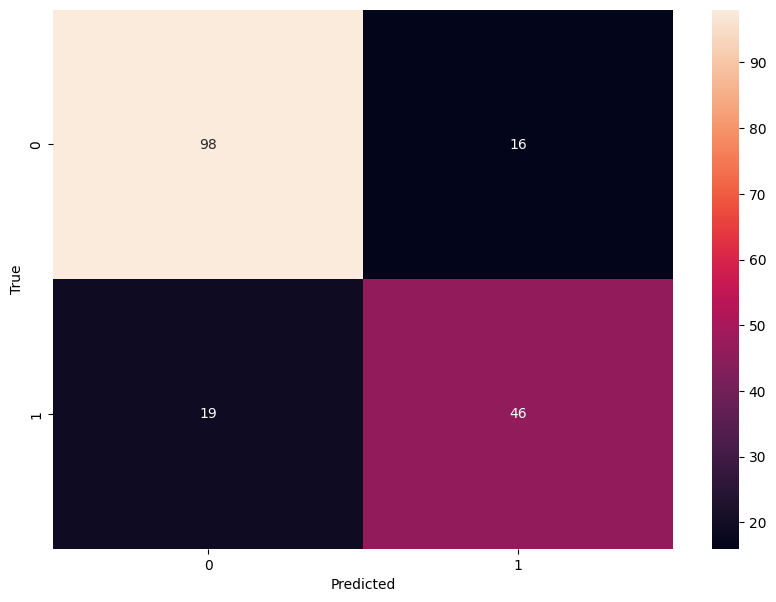

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(10,7))
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")